# Python notebook to reproduce _Supplementary Figure 7_

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import plot_settings
import plot_utils

In [2]:
fig_dir = 'supplementary/figure_7/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [3]:
df = pd.read_csv('results/LINCS/processed_dataset_statistics.csv')

In [4]:
cell_lines = df['cell_id'].tolist()

# Code to reproduce Supplementary figure 7

Supplementary Fig. 7

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


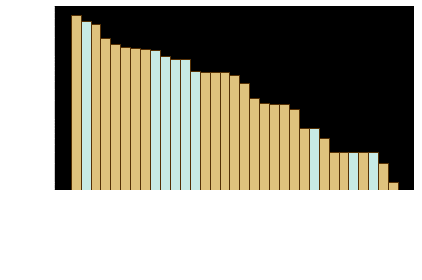

In [5]:
%matplotlib inline

cell_line_counts = {cl: len([x for x in cell_lines if x == cl]) for cl in np.unique(cell_lines)}
sorted_cls = sorted(list(cell_line_counts.keys()), key=lambda cl: -cell_line_counts[cl])

ax = plot_settings.get_wider_axis()
bcolor = plot_settings.get_sag_vs_baseline_colors('baseline')
emph_color = plot_settings.get_sag_vs_baseline_colors('Sagittarius')
ecolor = plot_settings.get_model_colors('cvae')

plot_utils.sorted_histogram(
    ax, cell_lines, sorted_cls, 'Cell line', 'Count in LINCS dataset',
    call_out_labels=['SKBR3', 'THP1', 'YAPC', 'MDAMB231', 'OCILY19', 'VCAP', 'A549', 'HS578T', 'U2OS'],
    base_color=bcolor, call_out_color=emph_color, 
    rotangle=-45, anchor='left', edge_color=ecolor, yscale='log')
plot_utils.format_ax(ax)
plt.tight_layout()
plt.savefig(fig_dir + 'figure_7.pdf')